# Import libraries

In [36]:
import numpy as np 
import scipy.io as sio 
import matplotlib.pyplot as plt 
import math

# Load data 

In [37]:
training_data = sio.loadmat("ex4data1.mat")
X: np.array = np.array(training_data['X'], dtype=np.float128)
y: np.array = np.array(training_data['y'], dtype=np.float128)
# Map label 10 from matlab back to 0 (python has index 0)
y[y == 10] = 0

test_theta_data = sio.loadmat("ex4weights.mat")
TestTheta1: np.array = np.array(test_theta_data['Theta1'], dtype=np.double)
TestTheta2: np.array = np.array(test_theta_data['Theta2'], dtype=np.double)
print("Data loaded")
print("Size of X:", X.shape)
print("Size of y:", y.shape)
print("Size of TestTheta1:", TestTheta1.shape)
print("Size of TestTheta2:", TestTheta2.shape)

Data loaded
Size of X: (5000, 400)
Size of y: (5000, 1)
Size of TestTheta1: (25, 401)
Size of TestTheta2: (10, 26)


# Display 100 random images

/usr/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Casting input data from 'float128' to 'float64' for imshow
  fig.canvas.print_figure(bytes_io, **kw)


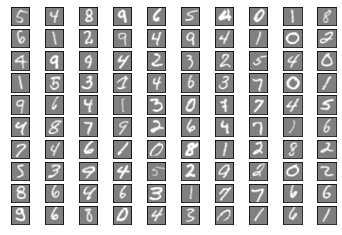

In [38]:
# Create 100 random indices
randIdx = np.random.randint(0, X.shape[0], 100).reshape(10, 10)
fig, ax = plt.subplots(10, 10)

for i in range(randIdx.shape[0]):
    for j in range(randIdx.shape[1]):
        example = X[randIdx[i, j]]
        example = example.reshape((20, 20)).T
        ax[i, j].imshow(example, vmin=-1, vmax=1, cmap='gray')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.show()

# Define utility functions

In [39]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def gsigmoid(z):
    s = sigmoid(z)
    return np.multiply(s, 1 - s)

# Define hypothesis function (feed-forward algorithm)

- Init `a1=x`
- Add bias term to `a1`
- Calculate `z2 = Theta1 * a1`
- Calculate `a2 = sigmoid(z2)`
- Calculate `z3 = Theta2 * a2`
- Calculate `h = a3 = sigmoid(z3)`

In [40]:
def hypothesis(x, Theta1, Theta2):
    a1 = np.vstack((1, x.reshape(-1, 1)))
    z2 = Theta1 @ a1
    a2 = np.vstack((1, sigmoid(z2).reshape(-1, 1)))
    z3 = Theta2 @ a2 
    h = sigmoid(z3)
    return (
        a1.reshape(-1, 1), 
        a2.reshape(-1, 1), 
        h.reshape(-1, 1), 
        z2.reshape(-1, 1), 
        z3.reshape(-1, 1)
    )

# Define cost function and its gradient

In [41]:
def costFunction(X, y, lambd, nn_params, hidden_layer_size, output_layer_size):
    m = X.shape[0]
    input_layer_size = X.shape[1]
    # nn_params: unrolled Theta1, Theta2 
    # Extract Theta1, Theta2 from nn_params 
    breakpnt = (input_layer_size + 1) * hidden_layer_size
    Theta1 = nn_params[:, None:breakpnt].reshape((hidden_layer_size, input_layer_size + 1))
    Theta2 = nn_params[:, breakpnt:None].reshape((output_layer_size, hidden_layer_size + 1))

    # print(np.sum(Theta1), np.sum(Theta2))
    
    J = 0 
    Theta1_grad = np.zeros(shape=Theta1.shape)
    Theta2_grad = np.zeros(shape=Theta2.shape)  
    Delta1 = 0 
    Delta2 = 0
    for example in X:
        x = example.reshape((-1, 1))
        # Feed-forward
        a1, a2, h, z2, z3 = hypothesis(x, Theta1, Theta2)
        # print(np.sum(a1), np.sum(z2), np.sum(a2), np.sum(z3), np.sum(h))
        # break
        # Compute J 
        y_hop = np.zeros(output_layer_size).reshape(-1, 1)
        y_hop[int(y[i])] = 1
        j = -y_hop.T @ np.log(h) - (1 - y_hop).T @ np.log(1 - h)
        J += float(j)

        # Back propagation 
        delta3 = h - y_hop 
        delta2 = np.multiply(Theta2.T @ delta3, gsigmoid(np.vstack((0, z2))))
        delta2 = delta2[1:None]
        Delta1 += delta2 @ a1.T 
        Delta2 += delta3 @ a2.T 
    # Average 
    J *= 1/m 
    # Add regularized term for cost function 
    theta1_reg = Theta1
    theta1_reg[:,0] = 0 
    theta2_reg = Theta2
    theta2_reg[:,0] = 0 
    J += lambd/(2*m) * (np.sum(np.power(theta1_reg, 2)) + np.sum(np.power(theta2_reg, 2)))
    # Regularized term for theta_gradient 
    Theta1_grad = (1/m * Delta1) + (lambd/m) * theta1_reg
    Theta2_grad = (1/m * Delta2) + (lambd/m) * theta2_reg

    # Unroll gradient 
    grad = np.hstack((Theta1_grad.reshape(1, -1), Theta2_grad.reshape(1, -1)))

    return (J, grad)

# Numerical gradient check

# Check cost at pretrained weight 

In [42]:
hidden_layer_size = 25
lambd = 0
output_layer_size = 10


9.344044006511831
9.344044006511831
